Add parent path to import things from there

In [1]:
import os
import random
import sys

parent_path = os.path.abspath("..")
sys.path.append(parent_path)

In [ ]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src import utils
from src.config_handler import CONFIG_HANDLER
from src.datastore import store


In [3]:
# generate a test dataframe for a given full month, having values for each weekday, ranging between 7.0 and 9.0 with one decimal
# df should have columns: day(index), total_time, pause, work
def gen_df_test():
    df2 = pd.DataFrame(
        {
            "day": pd.date_range(start='2021-01-01', periods=31).date,
            "total_time": [round(random.uniform(7.5, 9), 1) for _ in range(31)],
            "pause": [round(random.uniform(0, 0.6), 1) for _ in range(31)],
        }
    )
    df2["work"] = df2["total_time"] - df2["pause"]
    return df2

In [5]:
text_color = utils.get_font_color()
background_color = utils.get_background_color()

def set_plot_parameters():
    plt.rcParams["date.autoformatter.day"] = "%d"
    plt.rcParams["date.autoformatter.month"] = "%b"
    plt.rcParams["figure.facecolor"] = background_color
    plt.rcParams["axes.facecolor"] = background_color
    plt.rcParams["text.color"] = text_color
    plt.rcParams["axes.edgecolor"] = text_color
    plt.rcParams["xtick.color"] = text_color
    plt.rcParams["ytick.color"] = text_color
    plt.rcParams["axes.labelcolor"] = text_color
    plt.rcParams["axes.titlecolor"] = text_color
    # Despine the plot right and top
    plt.rcParams["axes.spines.right"] = False
    plt.rcParams["axes.spines.top"] = False
    plt.rcParams["font.family"] = "DejaVu Sans Mono"

set_plot_parameters()

In [10]:
df

,total_time,start_time,end_time,pause,work,break_time,target_time,overtime
day,,,,,,,,
2025-01-01,8.00,None,None,0.0,8.00,0.0,8.0,0.00
2025-01-02,8.70,06:10:00,15:52:00,1.0,7.70,1.0,8.0,-0.30
2025-01-03,7.78,06:48:00,15:35:00,1.0,6.78,1.0,6.0,0.78
2025-01-04,0.00,None,None,0.0,0.00,0.0,0.0,0.00
2025-01-05,0.00,None,None,0.0,0.00,0.0,0.0,0.00
2025-01-06,8.00,None,None,0.0,8.00,0.0,8.0,0.00
2025-01-07,7.95,06:34:00,15:31:00,1.0,6.95,1.0,8.0,-1.05
2025-01-08,8.43,06:33:00,15:59:00,1.0,7.43,1.0,8.0,-0.57
2025-01-09,9.10,06:19:00,15:25:00,0.0,9.10,0.0,8.0,1.10


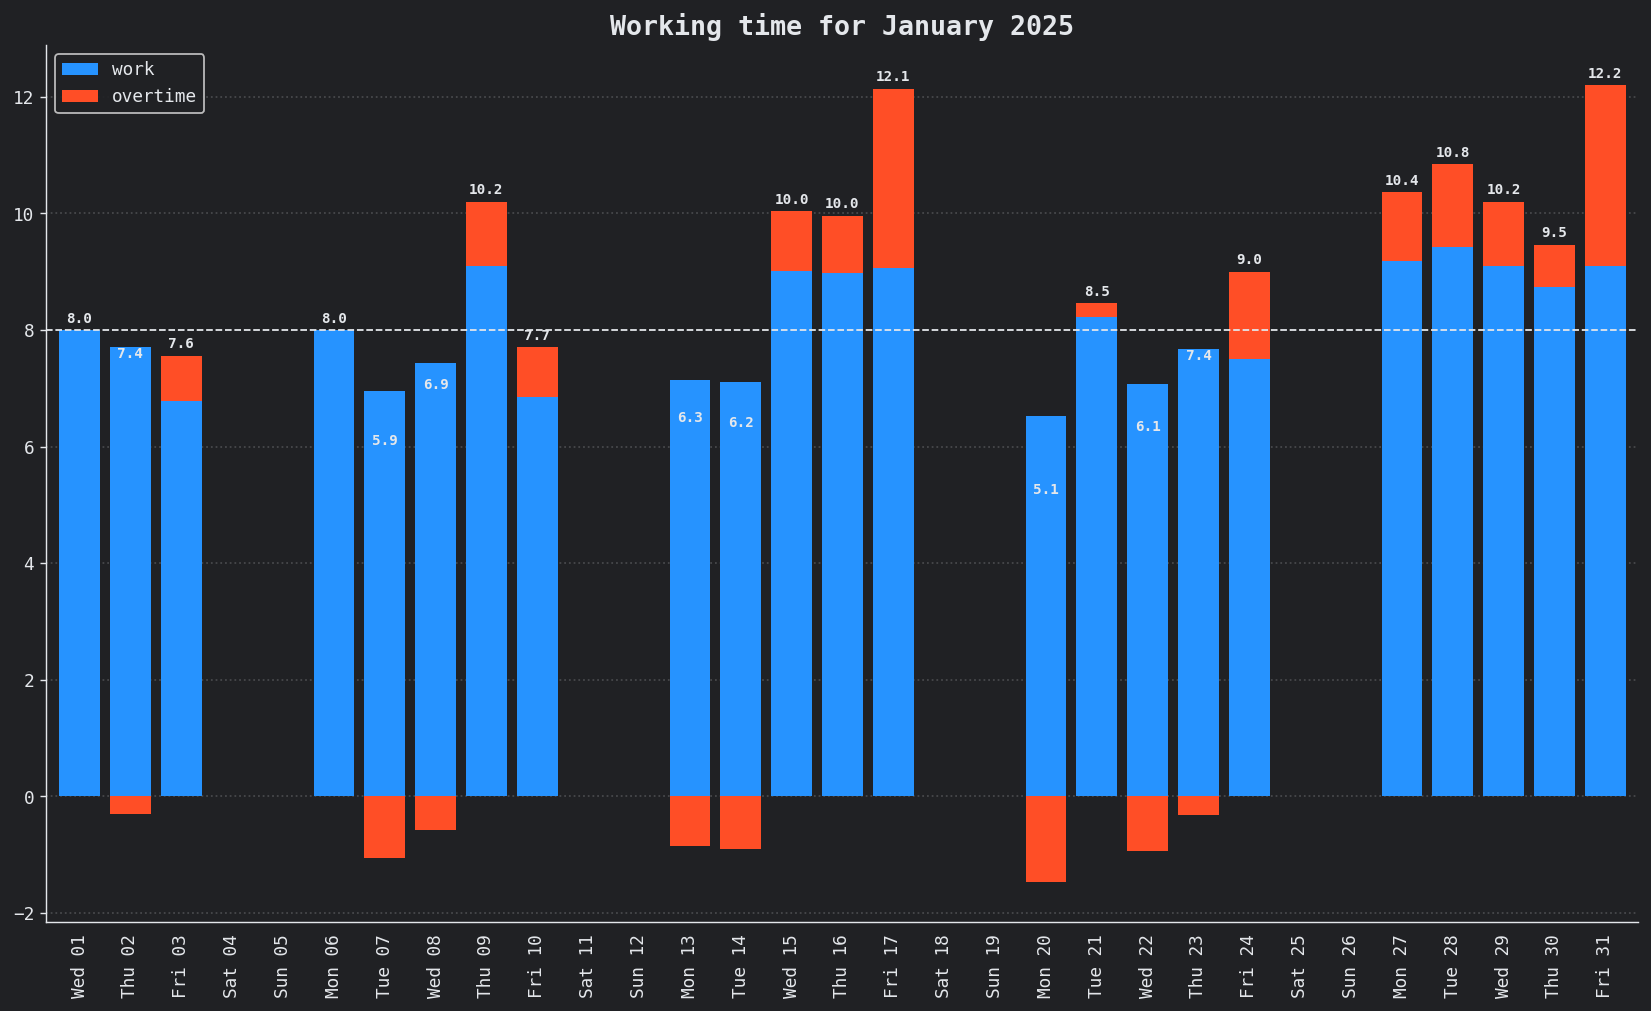

In [ ]:
plot_month = True
use_pause = True
selected_date = datetime.date(2025, 1, 1)


def generate_plot_df(df: pd.DataFrame) -> pd.DataFrame:
    cols = ["work", "overtime"]
    if CONFIG_HANDLER.config.plot_pause:
        cols.append("pause")

    plot_df = df[cols].copy()
    plot_df["color"] = df["overtime"].apply(lambda x: "positive" if x >= 0 else "negative")

    return df[cols]

# clears the old values and then adds a subplot to insert all the data
fig = plt.figure(figsize=(13, 8), dpi=128, tight_layout=True)
# self.figure.clear()
ax = fig.add_subplot(111)

# update the store before plotting
store.update_data(selected_date)
# get the store date -> this is needed to show the correct month in the dropdown
# if the user did not change it there before
# self._only_change_date(store.current_date)

if plot_month:
    df = store.df.copy()
    needed_hours = CONFIG_HANDLER.config.daily_hours
else:
    df = store.get_year_data(store.current_date.year)
    # lets use "easy" constant monthly working hours for now
    needed_hours = CONFIG_HANDLER.config.weekly_hours * 52 / 12
plot_df = generate_plot_df(df)
plot_df.plot.bar(stacked=True, ax=ax, width=0.8, color=["#2693ff", "#ff4e26", "#25cf5e"], zorder=2)
sns.p
ax.legend(fancybox=True, framealpha=0.9)

ax.axhline(needed_hours, color=text_color, ls="--", lw=1, zorder=3)
ax.yaxis.grid(True, lw=1, ls=":", color=text_color, alpha=0.2, zorder=1)
ax.xaxis.get_label().set_visible(False)

if plot_month:
    tick_labels = [day.strftime("%a %d") for day in plot_df.index]
    rotation = "vertical"
    # shift the xticks to the middle of the bars
else:
    tick_labels = [month.strftime("%b") for month in plot_df.index]
    rotation = "horizontal"
ax.set_xticklabels(tick_labels, rotation=rotation)

# hide the x ticks
ax.tick_params(axis="x", which="both", bottom=False, top=False)

# Add numbers above the bars
for i, (_, row) in enumerate(plot_df.iterrows()):
    total_time = sum(row)
    if total_time <= 0.0:
        continue
    # put small offset for the numbers to not overlap with the bar
    position = (i, total_time + 0.01 * needed_hours)
    # last 3% will collide with the line, in this case just put it above the line already
    line_collide = 0.97 * needed_hours <= total_time <= needed_hours
    if line_collide:
        position = (i, 1.01 * needed_hours)
    ax.annotate(f"{total_time:.1f}", position, ha="center", va="bottom", fontsize=8, weight="bold")

if plot_month:
    title = f"Working time for {store.current_date.strftime('%B %Y')}"
else:
    title = f"Working time for {store.current_date.year}"
ax.set_title(title, weight="bold", fontsize=15)
# self.figure.autofmt_xdate(rotation=90)
plt.show()
    